# Bayesian approach to multiple lines of evidence

This notebook shows a short demonstration of how we can take a Bayesian approach to combining a prior with multiple independent sources of information (likelihoods, in Bayesian language) to calculate a posterior reflecting the combination of those different lines of evidence.  This demonstrations specifically shows how we can combine different conjugate distributions relatively simply.  It isn't really necessary to take a 'full Bayesian' approach here as it turns out.  But nevertheless it shows how if our prior and likelihoods are conjugate distributions, the maths behind their combination is simple. 

The idea and data for this example come from the following paper:

> Annan, J.D. and Hargreaves, J.C., 2006. Using multiple observationally‐based constraints to estimate climate sensitivity. Geophysical Research Letters, 33(6).

Annan and Hargreaves were pushing back againsts some very high values of Equilibrium Climate Sensitivity (ECS) that had been published in the literature in the prior years (e.g. see [here](https://journals.ametsoc.org/view/journals/clim/15/22/1520-0442_2002_015_3117_aobeot_2.0.co_2.xml)), many of these estimates based on perturbed physics ensembles of models.  Annan and Hargreaves argue that a more realistic prior and the combination of various independent lines of evidence (likelihoods) results in a narrower range of ECS than had been published and that their approach all but eliminates the higher tail of ECS that has appeared in the literature.  

Here, we reproduce their approach, primarily to show how different distributions (here defined as a prior and several likelihoods) can be combined to give a posterior. 

Let's get out libraries first:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm # these are the two distributions we'll use here
# plt.rcParams['font.family'] = 'Helvetica'


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\mayae\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\mayae\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\mayae\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\mayae\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

We first define the prior. Annan and Hargreaves use a notation in the paper with three number to indicate the central value and 95% limits of a probability density function describing the data:

> in this notation, used throughout this paper, the central value indicates the maximum likelihood estimate in degrees Celsius and the outer values represent the limits of the 95% confidence interval for a pdf, or 95% of the area under the curve for a likelihood function.

For the prior then, they therefore write: 

> We use as a typical representative of this class of constraints a probabilistic estimate of (1, 3, 10).  Since this distribution is strongly asymmetric, we use the gamma distribution as a parsimonious representation, using shape and scale parameters 3.2 and 1.36. We take this distribution as our prior with which additional information in the form of likelihood functions will be combined.

In Python terms, we can write this using the `gamma.pdf()` with the two parameters they describe. We'll also plot this to look at it: 

In [3]:
# define the initial prior based on 20th-century warming (which is a gamma distribution)
prior_shape = 3.2
prior_scale = 1.36
ecs_values = np.linspace(0, 10, 1000)
prior_pdf = gamma.pdf(ecs_values, a=prior_shape, scale=prior_scale)

# plot the prior distribution
plt.figure(figsize=(8, 5))
plt.plot(ecs_values, prior_pdf,'r')
plt.title('Prior Distribution of Equilibrium Climate Sensitivity')
plt.xlabel('ECS')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

NameError: name 'gamma' is not defined

Note that this is subjective (a major complaint about Bayesian statistics) - there were a number of ways one could characterize the prior.  It is here we first encounter the potential for subjectivity in the prior and the need to select a reasonable one -- but also to be aware of its 

We now define the likelihoods in the same way.  The authors give 2 primary constraints and 2 additional ones.  For volcanic cooling, they write this about constructing the likelihood distribution:

> The short-term large-scale cooling following volcanic eruptions has also recently been used to estimate climate sensitivity ... We therefore use a gamma function with shape and scale parameters 8.5 and 0.40 as our likelihood function. The shape of this function is described by (1.5, 3, 6).

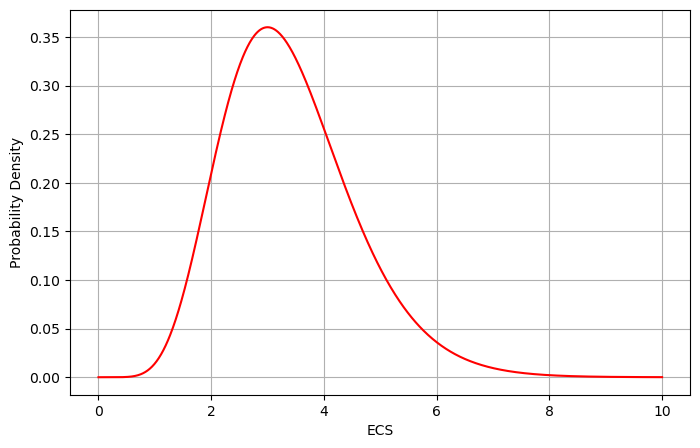

In [7]:
# Likelihood for volcanic cooling (Gamma)
volcanic_shape = 8.5
volcanic_scale = 0.40
volcanic_pdf = gamma.pdf(ecs_values, a=volcanic_shape, scale=volcanic_scale)

# plot the likelihood distribution
plt.figure(figsize=(8, 5))
plt.plot(ecs_values, volcanic_pdf,'r')
plt.xlabel('ECS')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


They also use the Last Glacial Maximum (LGM) cooling as a constraint, write:

> Temperatures at the Last Glacial Maximum (LGM) were substantially lower than the modern pre-industrial state for an extended period ...  our likelihood function has the form (−0.6, 2.7, 6.1). This near-symmetric shape is well described by the Gaussian distribution with mean 2.7°C and standard deviation 1.7°C.

Note there are [more recent estimates of LGM cooling and the inferred ECS](https://www.nature.com/articles/s41586-020-2617-x) we could draw on if the paper were published today.  Expressing their likelihood in Python:

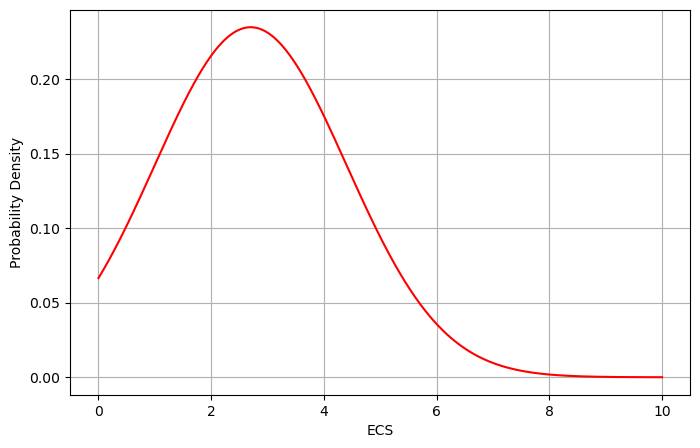

In [9]:
# Likelihood for LGM cooling (Normal)
lgm_mean = 2.7
lgm_std_dev = 1.7
lgm_pdf = norm.pdf(ecs_values, loc=lgm_mean, scale=lgm_std_dev)

# plot the likelihood distribution
plt.figure(figsize=(8, 5))
plt.plot(ecs_values, lgm_pdf,'r')
plt.xlabel('ECS')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


The authors also give two additional constraints.  One from model ensembles and one from cooling during the Maunder Minimum (which I think is pretty sketchy, personnally):

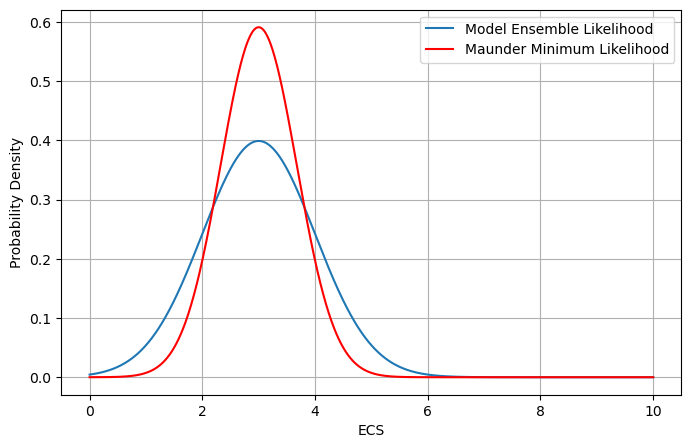

In [11]:
# likelihood for ensemble models 
ensemble_mean = 3.0
ensemble_std_dev = 1.0
ensemble_pdf = norm.pdf(ecs_values, loc=ensemble_mean, scale=ensemble_std_dev)

# likelihood for Maunder Minimum 
maunder_mean = 3.0
maunder_std_dev = 0.675
maunder_pdf = norm.pdf(ecs_values, loc=maunder_mean, scale=maunder_std_dev)

# plot the likelihood distribution
plt.figure(figsize=(8, 5))
plt.plot(ecs_values, ensemble_pdf,label='Model Ensemble Likelihood')
plt.plot(ecs_values, maunder_pdf,'r',label='Maunder Minimum Likelihood')
plt.xlabel('ECS')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


We now have our prior and our various likelihoods.  The authors describe their Bayesian-like procedure thuly:

> Bayes' Theorem tells us how to update a probabilistic estimate for an unknown variable x (such as climate sensitivity) in the light of new information ... We note that in the case where the new observation is conditionally independent of previous data for a given climate sensitivity, the likelihood of [the probability] of x given O. So we can iteratively combine new information with a prior probabilistic estimate simply by multiplying the prior pdf with the likelihood function arising from the new data, and renormalising appropriately.

This is actually quite a simple operation.  Let's take our prior and the first likelihood, which we will multiply.  We will then 'renormali(se) appropriately' by dividing the numerator of Bayes Rule by the area under the curve of the numerator: 


In [14]:
!pip install --upgrade numpy

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.7 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.7 kB ? eta -:--:--
     ------------- ------------------------ 20.5/59.7 kB 162.5 kB/s eta 0:00:01
     -------------------------- ----------- 41.0/59.7 kB 245.8 kB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 287.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.2/12.6 MB 5.0 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/12.6 MB 9.5 MB/s eta 0:00:02
   ----- ---------------------------------- 1.7/12.6 MB 15.2 MB/s eta 0:00:01
   -------- ------------------------------- 2.8/12.6 MB 16.4 MB/s eta 0:00:01
   ------------ --------------------------- 4.0/12.6 MB 18.2 MB/s eta 0:00:01
   ------------------ --------------------- 5.8/12.6 MB 20.6 MB/s eta 0:00:01
   ---

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.1.2 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.1.2 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.1.2 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.1.2 which is incompatible.


In [13]:
# update the prior with the volcanic cooling likelihood by multiplying the PDFs
posterior_1 = prior_pdf * volcanic_pdf
posterior_1 /= np.trapezoid(posterior_1, ecs_values) # normalize to area under the curve = 1


AttributeError: module 'numpy' has no attribute 'trapezoid'

From the description in Annan and Hargreaves (which is woefully inadequate for a paper such as this, in my opinion!), the authors appear to then proceed sequentially, using the new posterior and then updating it with new likelihoods and renormalizing at each step:

In [7]:
# update posterior with LGM cooling likelihood
posterior_2 = posterior_1 * lgm_pdf
posterior_2 /= np.trapezoid(posterior_2, ecs_values)

# update posterior with ensemble models likelihood
posterior_3 = posterior_2 * ensemble_pdf
posterior_3 /= np.trapezoid(posterior_3, ecs_values)

# update posterior with Maunder Minimum likelihood
final_posterior = posterior_3 * maunder_pdf
final_posterior /= np.trapezoid(final_posterior, ecs_values)


We can now plot the prior, the (renormalized) likelihoods, and final posterior on a single plot showing ECS distributions from each:

In [ ]:
# plot the prior, each of the intermediate steps toward the posterior, and the final posterior
plt.figure(figsize=(10, 6))
plt.plot(ecs_values, prior_pdf, label='Prior (20th Century Warming)', linestyle='--', color='blue')
plt.plot(ecs_values, volcanic_pdf, label='Volcanic Cooling Likelihood', linestyle=':', color='blue')
plt.plot(ecs_values, lgm_pdf, label='LGM Cooling Likelihood', linestyle='-.', color='blue')
plt.plot(ecs_values, ensemble_pdf, label='Ensemble Models Likelihood', linestyle='--', color='green')
plt.plot(ecs_values, maunder_pdf, label='Maunder Minimum Likelihood', linestyle='-.', color='green')
plt.plot(ecs_values, final_posterior, label='Final Posterior', linestyle='-', color='red')

plt.xlabel('ECS (°C)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# calculate the mean of the PDF
mean = np.sum(ecs_values * final_posterior) * np.diff(ecs_values).mean()

# calculate the median of the PDF
cumulative = np.cumsum(final_posterior) * np.diff(ecs_values).mean()
median = ecs_values[np.searchsorted(cumulative, 0.5)]

# calculate the 2.5% and 97.5%  (e.g. the 95% range) credible intervals
lower_25 = ecs_values[np.searchsorted(cumulative, 0.025)]
upper_975 = ecs_values[np.searchsorted(cumulative, 0.975)]

# display the results for the ECS estimate and uncertainty
mean, median, lower_25, upper_975

The mean and median both indicate a central estimate of ECS of 3C, with a 95% credible interval of 2.1 to 3.9C

In [ ]:
threshold_index = np.searchsorted(ecs_values, 4.5)
probability_ecs_gt_4_5 = np.trapezoid(final_posterior[threshold_index:], ecs_values[threshold_index:])
probability_ecs_gt_4_5


The probability of ECS being greater than 4.5C from this posterior is tiny (>> 1%)!  

## Next Steps

The posterior will be sensitive to both the specification of the prior and the selection (and specification) of the likelihood(s).  Play around with changing these components of the ECS posterior estimate.  Specifically:

1. Use a uniform prior between 0 and 10 (see code below) - how sensitive is the result (mean, credible interval, probability of ECS>4.5C) to the choice of prior?

In [11]:
# create a uniform prior PDF instead
uniform_density = 1 / (ecs_values[-1] - ecs_values[0])  # Constant probability density for uniform distribution, but will need to integrate to 1 over 0 to 10
uniform_prior_pdf = np.full_like(ecs_values, uniform_density) # because of the line above, PDF will integrate to 1

2. How might the posterior change with new information?  For instance, here are two papers which change the nature of the likelihoods used here:

> Pauling, A.G., Bitz, C.M. and Armour, K.C., 2023. The climate response to the Mt. Pinatubo eruption does 
> not constrain climate sensitivity. Geophysical Research Letters, 50(7), p.e2023GL102946.

> Tierney, J.E., Zhu, J., King, J., Malevich, S.B., Hakim, G.J. and Poulsen, C.J., 2020. Glacial cooling and
>  climate sensitivity revisited. Nature, 584(7822), pp.569-573.